1. Let's start by scraping the text from the blog post

In [1]:
from bs4 import BeautifulSoup as bs
import requests
url="https://medium.com/mindfulness-and-meditation/to-make-reconciliation-possible-19e357bfac47"
response = requests.get(url)
response

<Response [200]>

In [2]:
html= response.content

In [3]:
soup=bs(html,"lxml")

2. We want here to select only the core text

In [5]:
blog_text= soup.find_all("p",limit=44)
core_text= ""
for p in blog_text:
    core_text+=p.text.strip().lower()

3. Let's import the libraries to start working on the text summarization

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
import re
from nltk.tokenize import sent_tokenize, word_tokenize

In [7]:
# Removing Square Brackets and Extra Spaces
core_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
core_text = re.sub(r'\s+', ' ', article_text)
core_text

'mindfulness and meditationjul 4, 2015good morning, dear sangha. today is the 13th of june in the year 2013, and we are on the third day of our retreat, “are you sure?”are you sure that the best moment of your life hasn’t arrived? if not, when? i think one of the most wonderful moments of our life was spent in the womb of our mother. at that time, we didn’t have to worry about anything. we didn’t have to struggle to survive. and the place was so comfortable. it was very soft and the weather was perfect. our mother breathed for us, ate for us, and drank for us. there was no worry, no fear, no anger. without fear, anger, and worries, the moment should be a wonderful moment. the chinese people call that place where we spend nine months or so “the palace of the child.”but when we were born, things were not the same. they cut the cord that linked us to our mother. you had to learn how to breathe in for the first time. you hadn’t learned how to breathe in yet. there was some liquid in your l

In [8]:
# Removing special characters and digits
formatted_text = re.sub('[^a-zA-Z]', ' ', core_text )
formatted_text = re.sub(r'\s+', ' ', formatted_text)
formatted_text

'mindfulness and meditationjul good morning dear sangha today is the th of june in the year and we are on the third day of our retreat are you sure are you sure that the best moment of your life hasn t arrived if not when i think one of the most wonderful moments of our life was spent in the womb of our mother at that time we didn t have to worry about anything we didn t have to struggle to survive and the place was so comfortable it was very soft and the weather was perfect our mother breathed for us ate for us and drank for us there was no worry no fear no anger without fear anger and worries the moment should be a wonderful moment the chinese people call that place where we spend nine months or so the palace of the child but when we were born things were not the same they cut the cord that linked us to our mother you had to learn how to breathe in for the first time you hadn t learned how to breathe in yet there was some liquid in your lungs unless you could spit it out you wouldn t

In [9]:
sentence_list = nltk.sent_tokenize(article_text)

4. We import the stopwords list for english. It is necessary to avoid including words like "the" or "a" which are too common and don't bring much significance for our analysis. We then create a loop on the formatted text that scores 1 if a word is not the in the stopwords list if not 0. 

In [11]:
from collections import Counter

nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
stopwords_english = stopwords.words("english")

word_frequencies = {}
for word in nltk.word_tokenize(formatted_text):
    if word not in stopwords_english:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1
Counter(word_frequencies).most_common(20)


[('fear', 64),
 ('anger', 56),
 ('help', 36),
 ('suspicion', 33),
 ('practice', 29),
 ('north', 27),
 ('us', 26),
 ('suffering', 26),
 ('father', 24),
 ('people', 22),
 ('suffer', 20),
 ('able', 17),
 ('person', 17),
 ('south', 17),
 ('like', 16),
 ('listening', 16),
 ('could', 15),
 ('lot', 15),
 ('understand', 15),
 ('make', 14)]

5. Let's plot it! We see that fear, anger and help are the most used words. 

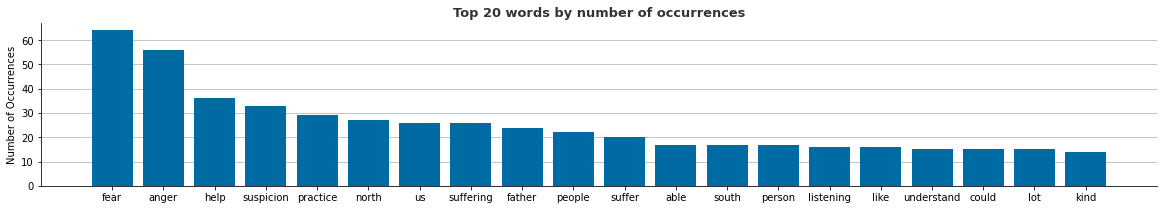

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df3 = pd.DataFrame(list(word_frequencies.items()),columns = ['word','frequency'])
df4=df3.sort_values('frequency',ascending=False).head(20).reset_index()
fig,ax = plt.subplots(figsize=(20,3))
ax.grid(which="major",axis="y", color='#758D99', alpha=0.6, zorder=1)
ax.spines[["top","right"]].set_visible(False)
plt.title('Top 20 words by number of occurrences', fontsize=13, weight='bold', alpha=.8)
plt.bar(x=df4['word'],height=df4['frequency'],color='#006BA2', zorder=2)
plt.ylabel('Number of Occurrences')
plt.savefig('occurrences.png',    
            dpi = 300,                     
            bbox_inches="tight",           
            facecolor='white')  

In [16]:
maximum_frequency = max(word_frequencies.values())

for word in word_frequencies.keys():
       word_frequencies[word] = (word_frequencies[word]/maximum_frequency)
Counter(word_frequencies).most_common(20)

[('fear', 1.0),
 ('anger', 0.875),
 ('help', 0.5625),
 ('suspicion', 0.515625),
 ('practice', 0.453125),
 ('north', 0.421875),
 ('us', 0.40625),
 ('suffering', 0.40625),
 ('father', 0.375),
 ('people', 0.34375),
 ('suffer', 0.3125),
 ('able', 0.265625),
 ('person', 0.265625),
 ('south', 0.265625),
 ('like', 0.25),
 ('listening', 0.25),
 ('could', 0.234375),
 ('lot', 0.234375),
 ('understand', 0.234375),
 ('make', 0.21875)]

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(list(word_frequencies.items()),columns = ['word','weighted_frequencies'])
df2=df.sort_values('weighted_frequencies',ascending=False).head(20).reset_index()
df2

,index,word,weighted_frequencies
0,39,fear,1.000000
1,40,anger,0.875000
2,175,help,0.562500
3,152,suspicion,0.515625
4,261,practice,0.453125
5,139,north,0.421875
6,36,us,0.406250
7,294,suffering,0.406250
8,105,father,0.375000
9,44,people,0.343750


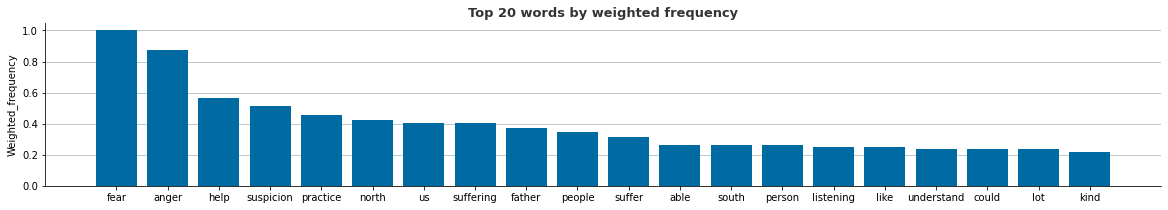

In [18]:
fig,ax = plt.subplots(figsize=(20,3))
ax.grid(which="major",axis="y", color='#758D99', alpha=0.6, zorder=1)
ax.spines[["top","right"]].set_visible(False)
plt.bar(x=df2['word'],height=df2['weighted_frequencies'],color='#006BA2', zorder=2)
plt.ylabel('Weighted_frequency')
plt.title('Top 20 words by weighted frequency', fontsize=13, weight='bold', alpha=.8)
plt.savefig('weighted_frequency.png',    
            dpi = 300,                     
            bbox_inches="tight",           
            facecolor='white') 

6. To calculate the sentence scores that will be used to build our summary, let's calculate their scores by adding weight frequencies of the words for sentences with more than 50 words. Thay expresses his most profound ideas in his longest sentences. 

In [29]:
sentence_scores = {}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) > 50 :
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]
                    
Counter(sentence_scores).most_common(10)

[('our political leaders haven’t been trained in the art of helping to remove fear, anger, and suspicion.that is why we have to call for help from those of us who are spiritual, who are compassionate, who know how to listen, and who know how to transform fear, anger, and suspicion in ourselves.when fear and anger become a collective energy, it’s so dangerous, and a war can break out at any time.i was in the united states on september 11, 2001. my book, anger, had just been published the week before.',
  9.796875),
 ('according to our experience of practice, if you want to help someone reduce their fear, anger, and suspicion, you first have to practice in order to reduce the amount of fear, anger, and suspicion in yourself.in busan, south korea, i gave a talk called “peace is possible” to a crowd of eleven thousand people.',
  8.609375),
 ('and they always promised that when they returned to the middle east, they would set up a sangha and organize the same kind of practice so that other

7. Here is the summary based on the 5 highest scored sentences. 

In [35]:
import heapq
summary_sentences = heapq.nlargest(5, sentence_scores, key=sentence_scores.get)

summary = ' '.join(summary_sentences)
summary


'our political leaders haven’t been trained in the art of helping to remove fear, anger, and suspicion.that is why we have to call for help from those of us who are spiritual, who are compassionate, who know how to listen, and who know how to transform fear, anger, and suspicion in ourselves.when fear and anger become a collective energy, it’s so dangerous, and a war can break out at any time.i was in the united states on september 11, 2001. my book, anger, had just been published the week before. according to our experience of practice, if you want to help someone reduce their fear, anger, and suspicion, you first have to practice in order to reduce the amount of fear, anger, and suspicion in yourself.in busan, south korea, i gave a talk called “peace is possible” to a crowd of eleven thousand people. and they always promised that when they returned to the middle east, they would set up a sangha and organize the same kind of practice so that other people could come and practice and su